<a href="https://colab.research.google.com/github/sujitrajt/NeuralNetwork/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello World")

Hello World


In [ ]:
#importing libraries
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Fetching the dataset using tensorflow
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape #(50000,32,32,3)

(50000, 32, 32, 3)

In [ ]:
X_test.shape #Gives the number of sample size , size of the pixels and rgb model

(10000, 32, 32, 3)

In [ ]:
#converting the 2d array into 1d array as we can easily match with the labels
y_train=y_train.reshape(-1,)
y_train


array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [ ]:
#The dataset consits of 10 classes and each of them has been added to the list names objects
objects = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
#function to plot and the image and label using the index parameter
def sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(objects[y[index]])


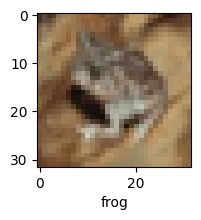

In [ ]:
#Sample
sample(X_train,y_train,6768)

In [ ]:
#The sample training data is represented in a RGB model i.e the values will be in betweem 0 and 255
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
#Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range,
#we need to divide it by 255X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
# Simple Artificial Neural Network Model to classify the image into the 10 categories we have defined above
model = models.Sequential([
        # Flattens the input. Flattening makes it a single column of rows
        layers.Flatten(input_shape=(32,32,3)),
        # Creating two hidden layers with 3000 neuron in the first hidden layer and using the Relu Activation Function
        layers.Dense(3000, activation='relu'),
        # Second Hidden layer with 1000 neuron in the second hidden layer and Relu as Activation function
        layers.Dense(1000, activation='relu'),
        # Classifying into 10 categories each of category
        layers.Dense(10, activation='softmax')
    ])
# Compile the model with adam optimizer,
# sparse_categorical_crossentropy : produces a category index of the most likely matching category.
# model will be complied and showed output in terms of accuracy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model with epoch5
model.fit(X_train, y_train, epochs=5)
# model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
1563/1563 [==============================] - 351s 224ms/step - loss: 28.5525 - accuracy: 0.1304
Epoch 2/5
1563/1563 [==============================] - 341s 218ms/step - loss: 2.3064 - accuracy: 0.0989
Epoch 3/5
1563/1563 [==============================] - 343s 220ms/step - loss: 2.3036 - accuracy: 0.0994
Epoch 4/5
1563/1563 [==============================] - 341s 218ms/step - loss: 2.3030 - accuracy: 0.0980
Epoch 5/5
1563/1563 [==============================] - 341s 218ms/step - loss: 2.3029 - accuracy: 0.0987


In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)
# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 9s 28ms/step


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

313/313 [==============================] - 10s 31ms/step - loss: 2.3027 - accuracy: 0.1000
Test accuracy: 10.00%


In [ ]:
#convolution Model using the same Training data and Testing data from CIFAR-10 Dataset
    #Creating two Convolution Layers with kernel size 3x3
    #Keras layer class used to define a 2D convolutional layer
    #filter - parameter specifies the number of filters or convolutional kernels that will be used in this layer
    #Activation Function - the activation function applied to the output of this convolutional layer.
    #input-shape- the shape of the input data that will be fed into this layer. In this case, it's a 32x32-pixel image with 3 color channels
model2 = models.Sequential([

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    #Second Convolution Layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #Flatten the layer and creating the dense layer for classification into 10 categories
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
#training the model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9933 - accuracy: 0.6545
Epoch 2/5
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9243 - accuracy: 0.6785
Epoch 3/5
1563/1563 [==============================] - 59s 37ms/step - loss: 0.8616 - accuracy: 0.6983
Epoch 4/5
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7958 - accuracy: 0.7231
Epoch 5/5
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7510 - accuracy: 0.7378
